### Reference: https://mccormickml.com/2019/07/22/BERT-fine-tuning/

### Train

In [1]:
from train import train_model_on_train_data


# Parameters
TRAIN_DATA_PATH = "../data/train.csv"
MODEL_NAME = "bert-base-cased"
BATCH_SIZE = 32
NUM_EPOCHS = 2

model, training_stats = train_model_on_train_data(TRAIN_DATA_PATH, MODEL_NAME, BATCH_SIZE, NUM_EPOCHS)

training_stats

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 2070 with Max-Q Design
EPOCH 1/2

BATCH 100/831:	Training loss(0.4737386703491211)
BATCH 200/831:	Training loss(0.5433842539787292)
BATCH 300/831:	Training loss(0.43249866366386414)
BATCH 400/831:	Training loss(0.6874415874481201)
BATCH 500/831:	Training loss(0.7496954202651978)
BATCH 600/831:	Training loss(0.6314347386360168)
BATCH 700/831:	Training loss(0.6248255372047424)
BATCH 800/831:	Training loss(0.5942318439483643)

Avg training loss:    0.5597956082665964

Avg validation loss:  0.5374070027823089


F1 validation score:  {'f1': 0.7633633633633633}

EPOCH 2/2

BATCH 100/831:	Training loss(0.4988784193992615)
BATCH 200/831:	Training loss(0.5587357878684998)
BATCH 300/831:	Training loss(0.45863181352615356)
BATCH 400/831:	Training loss(0.41083231568336487)
BATCH 500/831:	Training loss(0.28434720635414124)
BATCH 600/831:	Training loss(0.45872581005096436)
BATCH 700/831:	Training loss(0.39057761430740356)
BATCH 80

### Plot learning curve

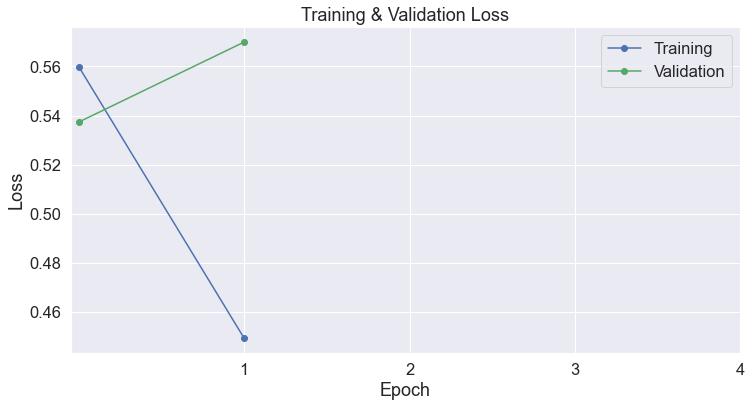

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_training = pd.DataFrame(training_stats)

plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.set(font_scale=1.5)

plt.plot(df_training['training_loss'], 'b-o', label="Training")
plt.plot(df_training['validation_loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

### Evaluate test data

In [7]:
from evaluate import evaluate_on_test_data


TEST_DATA_PATH = "../data/eval.csv"


testing_stats = evaluate_on_test_data(model, TEST_DATA_PATH, MODEL_NAME, BATCH_SIZE)

testing_stats

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 2070 with Max-Q Design

Avg test loss:  0.5439704189998935
F1 test score:  {'f1': 0.7665375233175491}



[{'test_loss': 0.5439704189998935,
  'test_f1_score': {'f1': 0.7665375233175491}}]